# **Project: Predicting Titanic Survival Using Logistic Regression**

## Analysis Objective

The purpose of this data analysis report is to perform a logistic regression analysis on the survival outcomes of Titanic passengers, based on attributes such as gender and passenger class. The resulting model can then be used to predict the likelihood of survival for passengers with unknown outcomes, given their attributes.

## Introduction

> The RMS Titanic(中文：泰坦尼克号) was an Olympic-class ocean liner that sank on its maiden voyage in April 1912 after colliding with an iceberg. It was the second of three sister ships in its class, designed along with the RMS Olympic and HMHS Britannic to provide transatlantic travel for the White Star Line.

> Built by the Harland and Wolff shipyard in Belfast, Northern Ireland, the Titanic was the largest passenger steamship of its time. Due to its immense size, comparable to a modern aircraft carrier, it was famously touted as "practically unsinkable." On its maiden voyage, it departed from Southampton, UK, with stops in Cherbourg, France, and Queenstown (now Cobh), Ireland, en route to New York City, USA. However, due to human error, it struck an iceberg at 11:40 PM ship's time on April 14, 1912. Two hours and forty minutes later, at 2:20 AM on April 15, the ship broke apart and sank into the North Atlantic. With over 1,500 fatalities, it remains one of the deadliest peacetime maritime disasters in modern history and is arguably the most famous.

The dataset consists of two tables: `titianic_train.csv` and `titanic_test.csv`.

The `titianic_train.csv` file records the survival outcomes for over eight hundred Titanic passengers, along with related passenger information. This includes passenger class, gender, age, the number of siblings/spouses aboard, the number of parents/children aboard, and more.

The `titanic_test.csv` file contains only the attribute information for a different set of passengers (not present in the training file). This file can be used to apply the model for survival prediction.

The meaning of each column in `titianic_train.csv` is as follows:
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

## Read data.

Import the lib needed for data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ori_train_data = pd.read_csv("E:\\Python\\e_analyze_data\\titanic_train.csv")
ori_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Evaluate and clean data.

Build a copy.

In [3]:
clean_train_data = ori_train_data.copy()

### Evaluate data tidiness.

In [4]:
clean_train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Looking at a sample of 10 rows, the data conforms to NF-3. Therefore, there is no structural issues.

### Evaluate data cleanliness

In [5]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the output, there are a total of 891 observations.  
`Age`, `Cabin`, `Embarked` **have missing data**.  

`PassengerId` **should be str**.(Lily's professional advise)   
`Sex`, `Embarked`, `Survived`, `Pclass` **should be 'Category'**.
We need to handle them later and convert their types.

In [6]:
clean_train_data['Sex'] = clean_train_data['Sex'].astype('category')
clean_train_data['Embarked'] = clean_train_data['Embarked'].astype('category')
clean_train_data['Survived'] = clean_train_data['Survived'].astype('category')
clean_train_data['Pclass'] = clean_train_data['Pclass'].astype('category')
clean_train_data['PassengerId'] = clean_train_data['PassengerId'].astype('str')
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### Handle missing data.

`Age`, `Cabin`, `Embarked` have missing data.  
cabin：船舱号
embarked：登船港口

In [7]:
# Age
# clean_train_data[clean_train_data['Age'].isna()]
clean_train_data[clean_train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


There are 177 missing values, making up about 20% of the total data.We should keep these rows.

Fill the missing values with average.

In [8]:
clean_train_data['Age'] = clean_train_data['Age'].fillna(clean_train_data['Age'].mean())
clean_train_data['Age'].isna().sum()

0

In [9]:
# Cabin
clean_train_data[clean_train_data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


There are 687 missing values, which means this info is mostly unknown

Moreover, we don't think the cabin num is a key factor for survival.It won't be included as an independent variable in our logistic regression model anyway.So, even if it's missing, it won't affect building the model.  
.So, we should't drop these values.

In [10]:
# Embarked
clean_train_data[clean_train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Only 2 missing values, and we don't think embarked is a key factor for survial, it won't be included as an independent variable in our logistic regression model, even if it's missing, it won't affect building the model.  
So, we keep these values.

#### Handle duplicated data.

Based on the variable means and its content, `PassengerId` should be a unique identifier. We should check it.

In [11]:
clean_train_data['PassengerId'].duplicated().sum()

0

From the output, there are no duplicated values.

#### Handle inconsistent data.

We should check all categorical variables.

In [12]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


In [13]:
clean_train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
clean_train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
clean_train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
clean_train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

From the output, there are no inconsistent data.

## Organize data.

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值。

In [17]:
clean_train_data['FamilyNum'] = clean_train_data['SibSp'] + clean_train_data['Parch']
clean_train_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1


## Explore data.

In [18]:
# Set the color palette to 'pastel'.
sns.set_palette('pastel')
# Set the figure size.
plt.rcParams['figure.figsize'] = [7.00, 3.50]
plt.rcParams['figure.autolayout'] = True

In [19]:
clean_train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


### Survival ratio.

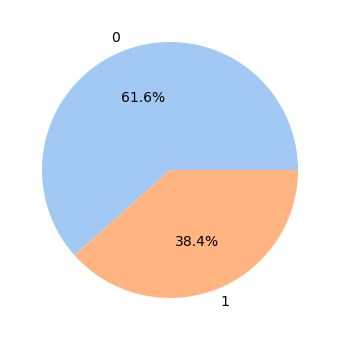

In [20]:
survive_num = clean_train_data['Survived'].value_counts()
survive_label = survive_num.index
plt.pie(survive_num, labels=survive_label, autopct='%.1f%%')
plt.show()

From the chart, the ratio of victims to survivors on the Titanic was approximately 3:2.

### Passenger age.

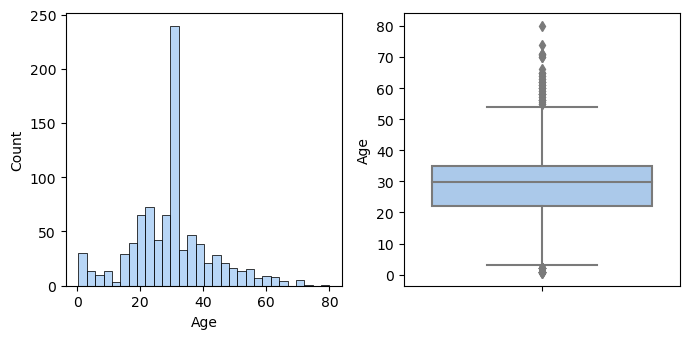

In [21]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=clean_train_data, x='Age', ax=axes[0])
sns.boxplot(data=clean_train_data, y='Age', ax=axes[1])
plt.show()

Most passengers were aged between 20 and 40, though there were also quite a few older passengers and infants.

### Passenger age vs. survival.

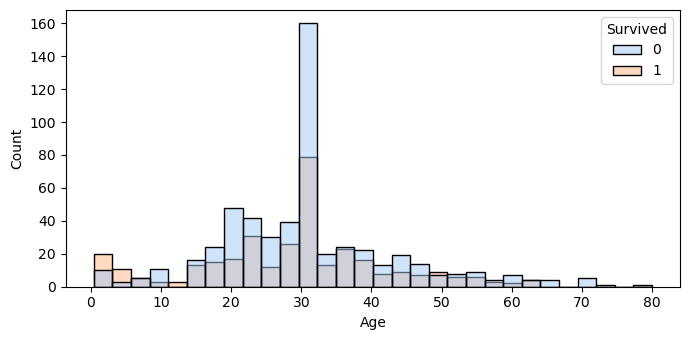

In [22]:
sns.histplot(data=clean_train_data, x='Age', hue='Survived', alpha=0.5)
plt.show()

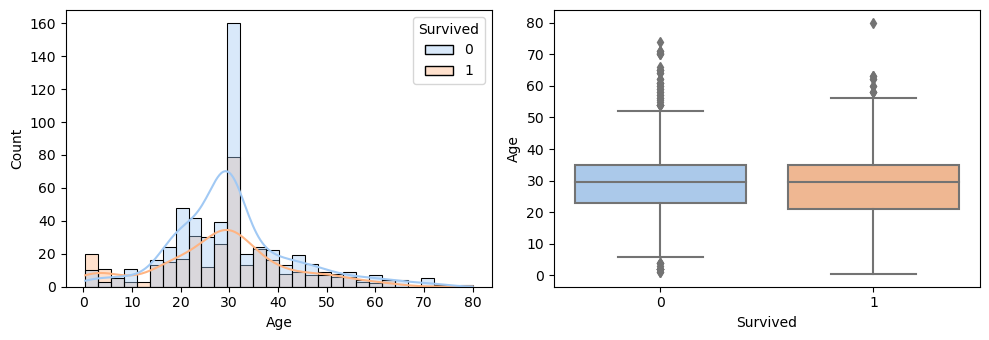

In [23]:
# Carmen's move.NO Use!!!
fig, axes = plt.subplots(1, 2, figsize=(10.00, 3.50))
sns.boxplot(data=clean_train_data, x='Survived', y='Age', ax=axes[1])
sns.histplot(data=clean_train_data, x='Age', hue='Survived', alpha=0.4, kde=True, ax=axes[0])
plt.show()

From the chart, with the exception of infants who had a relatively high survival rate, all other age grouops saw more victims than survivors.

### Fare distribution.

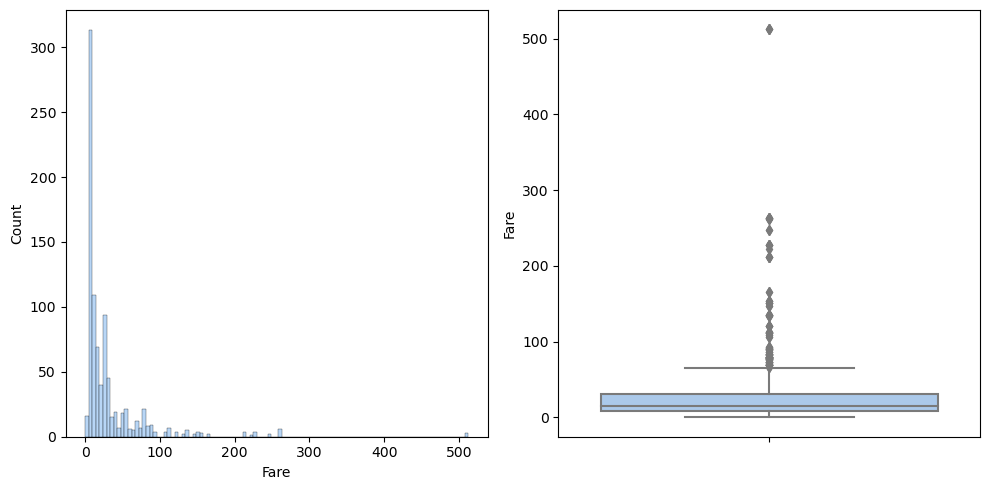

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=clean_train_data, x='Fare', ax=axes[0])
sns.boxplot(data=clean_train_data, y='Fare', ax=axes[1])
plt.show()

From the chart, the fare distribution is right-skewed, which means most ticket prices in the data are moderate, but a few extreme high fares pull up the average.

### Sex vs. survival.

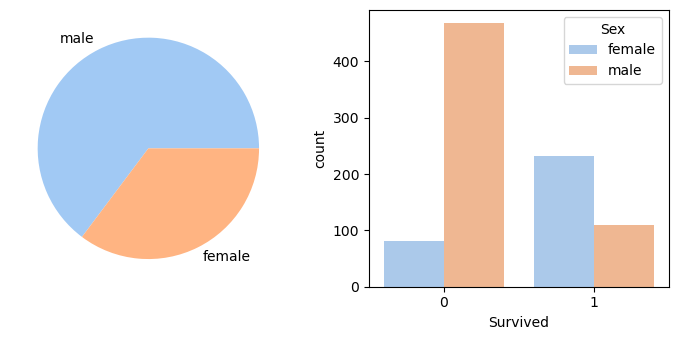

In [25]:
fig, axes = plt.subplots(1, 2)
sex_num = clean_train_data['Sex'].value_counts()
sex_label = sex_num.index
axes[0].pie(sex_num, labels=sex_label)
sns.countplot(data=clean_train_data, x='Survived', hue='Sex', ax=axes[1])
plt.show()

From the chart, more male passengers perished, while more female passengers survived.

### Embarkation vs. survival.

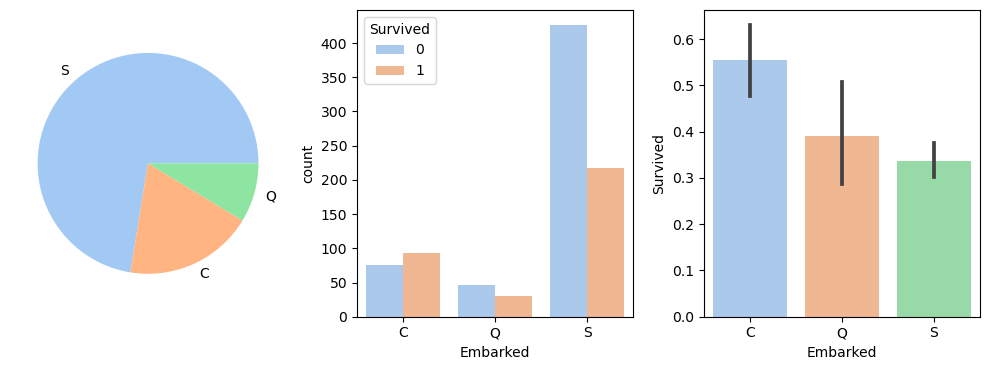

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3.8))
embark_num = clean_train_data['Embarked'].value_counts()
embark_label = embark_num.index
axes[0].pie(embark_num, labels=embark_label)
sns.countplot(data=clean_train_data, x='Embarked', hue='Survived', ax=axes[1])
clean_train_data['Survived'] = clean_train_data['Survived'].astype(float)
sns.barplot(data = clean_train_data,
           x = 'Embarked',
           y = 'Survived',
           estimator = lambda x: sum(x)/len(x),
           ax=axes[2])
plt.show()

Unlike passengers from Q and S, those who embarked at C had more survivors than victims.

### Family size vs. survival.

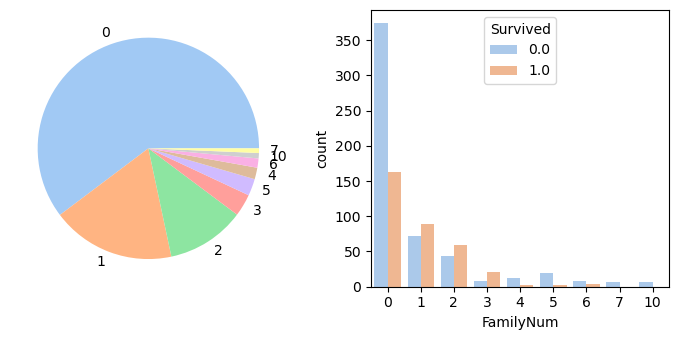

In [27]:
fig, axes = plt.subplots(1, 2)
family_num = clean_train_data['FamilyNum'].value_counts()
family_label = family_num.index
axes[0].pie(family_num, labels=family_label)
sns.countplot(data=clean_train_data, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

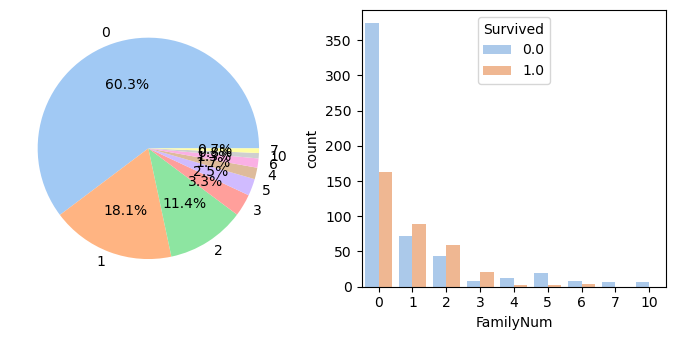

In [28]:
fig, axes = plt.subplots(1, 2)
family_num = clean_train_data['FamilyNum'].value_counts()
family_label = family_num.index
axes[0].pie(family_num, labels=family_label, autopct='%1.1f%%')
sns.countplot(data=clean_train_data, x='FamilyNum', hue='Survived', ax=axes[1])
plt.tight_layout()
plt.show()

From the chart,   
among passengers traveling alone, more perished than survived.  
For those with family, when traveling with 1 to 3 family members, survivors outnumbered victims.   
For those with more than 3 family mambers, victims outnumbered survivors

In [29]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    float64 
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  FamilyNum    891 non-null    int64   
dtypes: category(3), float64(3), int64(3), object(4)
memory usage: 72.7+ KB


## Analyze data.

### Train data.

Import the lib needed for data analyze.

In [30]:
import statsmodels.api as sm

Create copy.

In [31]:
lr_titanic_train = clean_train_data.copy()
lr_titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


Drop the unlikely predictors of survival.

In [32]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId', 'Name', 
                                          'Ticket', 'Cabin', 'Embarked'], 
                                         axis=1)
lr_titanic_train.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0.0,3,male,22.0,1,0,7.2500,1
1,1.0,1,female,38.0,1,0,71.2833,1
2,1.0,3,female,26.0,0,0,7.9250,0
3,1.0,1,female,35.0,1,0,53.1000,1


In [33]:
# Import dummies.
lr_titanic_train = pd.get_dummies(lr_titanic_train, 
                                 columns = ['Pclass', 'Sex'], 
                                 drop_first = True, 
                                 dtype = int)
lr_titanic_train.head(4)

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0.0,22.0,1,0,7.2500,1,0,1,1
1,1.0,38.0,1,0,71.2833,1,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,0
3,1.0,35.0,1,0,53.1000,1,0,0,0


In [34]:
y = lr_titanic_train['Survived']
X = lr_titanic_train.drop(['Survived'], axis=1)

In [35]:
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


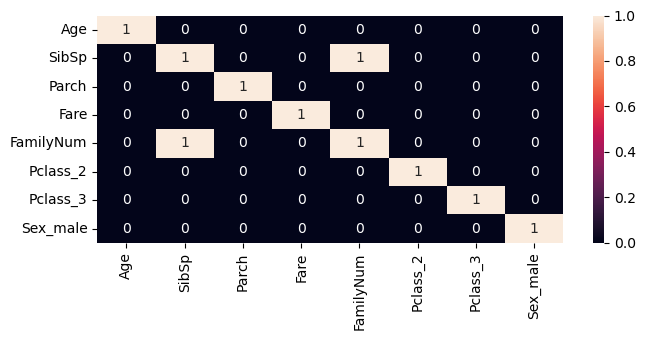

In [36]:
sns.heatmap(X.corr().abs()>0.8, annot=True)
plt.show()

In [37]:
X = X.drop(['SibSp', 'Parch'], axis=1)

In [38]:
X = sm.add_constant(X)

In [41]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 06 Jan 2026   Pseudo R-squ.:                  0.3339
Time:                        10:42:03   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

Set $α=0.05$ ， the high p-value for fare means it doesn't have a significant effect on survival.   
So, we can drop it and re-run the logistic regression.

In [42]:
X = X.drop(['Fare'], axis=1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 06 Jan 2026   Pseudo R-squ.:                  0.3323
Time:                        10:51:32   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

The Logit_model predicts that the odds of survival decrease with:  
- older age  
- more family members   
- not traveling in Pclass_1  
- being male.

In [43]:
# β_Age
np.exp(-0.0395)

0.9612699539905982

From the res: with each additional year of age, the odds of survival decrease by about 4%

In [44]:
# β_FamilyNum
np.exp(-0.2186)

0.803643111115195

From the res: with one additional family member onboard, the odds of survival decrease by about 20%.

In [45]:
# β_Pclass_2
np.exp(-1.1798)

0.30734020049483596

From the res, the odds of survival for Pclass_2 are about 71% lower compared to Pclass_1.

In [46]:
# β_Pclass_3
np.exp(-2.3458)

0.09577055503172162

From the res, the odds of survival for Pclass_3 are about 90% lower compared to Pclass_1.

In [54]:
def coef_transform(c):
    return 1 - np.exp(c)

In [55]:
# β_Sex_male
coef_transform(-2.7854)

0.9382955976669849

From the res, the odds of survival for male are about 94% lower compared to female.

Based on the model parameters, we conclude:  
- Younger passengers had higher odds of survival.  
- Female passengers had significantly higher odds of survival than males.  
- Passengers from a higher Pclass had higher odds of survival.  
- Passengers with fewer family mambers onboard had higher odds of survival.

The first two findings are likely connected to the 'Women and children first' principle during the evacuation.  
The 3rd finding might be because passengers in Pclass_1 probably had priority access to lifeboats.  
The 4th finding might be because passengers with larger families took time to find and help their family members, which could have used up their own chance to escape.

### Predict data.

In [56]:
titanic_test = pd.read_csv("E:\\Python\\e_analyze_data\\titanic_test.csv")
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [57]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From the output, `Age`, `Fare`, `Cabin` have missing values,  
**only `Age` is variable in the Logit_model**, we need to perform the same operation as we did for `clean_train_data` --fill it with average.

In [58]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test['Age'].isna().sum()

0

In [60]:
titanic_test['Pclass'] = pd.Categorical(titanic_test['Pclass'], 
                                        categories = ['1', '2', '3'])
titanic_test['Sex'] = pd.Categorical(titanic_test['Sex'], 
                                     categories = ['female', 'male'])
titanic_test['Embarked'] = pd.Categorical(titanic_test['Embarked'],
                                          categories = ['C', 'Q', 'S'])

In [61]:
titanic_test = pd.get_dummies(titanic_test, 
                              drop_first=True, 
                              dtype=int, 
                              columns=['Pclass', 'Sex'])
# Embarked isn't a input independent variable.
titanic_test.head(2)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0


In [62]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

**Omitted variable: `FamilyNum`**

In [63]:
titanic_test['FamilyNum'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test.head(2)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1


In [68]:
X_test = titanic_test[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)

In [69]:
pred_value = model.predict(X_test)
pred_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

Classify passengers with a predicted probability  
$>= 0.5$ as surcicors,  
$< 0.5$ as non-survivors.

In [70]:
pred_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool